In [43]:
file_path = "/content/brazil_wikipedia.pdf"

In [44]:
!pip install PyPDF2
from PyPDF2 import PdfReader
import nltk
nltk.download('punkt')

# Extracting Text from PDF
def extract_text_from_pdf(file_path):
    with open(file_path, 'rb') as file:
        pdf = PdfReader(file)
        text = " ".join(page.extract_text() for page in pdf.pages)
    return text

# Extract text from the PDF and split it into sentences
text = extract_text_from_pdf(file_path)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [45]:
sample = text[650:2701]
print(sample)

 Brazil is the world's fifth-largest country by area
and the seventh most populous . Its capital is Brasília , and
its most populous city is São Paulo . The federation is
composed of the union of the 26 states  and the Federal
District . It is the only country in the Americas  to have
Portuguese  as an official language .[12][13] It is one of the
most multicultural  and ethnically diverse nations, due to
over a century of mass immigration from around the
world ,[14] and the most populous Roman Catholic-
majority country .
Bounded by the Atlantic Ocean  on the east, Brazil has a
coastline  of 7,491 kilometers (4,655 mi).[15] It borders all
other countries and territories in South America except
Ecuador  and Chile  and covers roughly half of the
continent's land area.[16] Its Amazon basin  includes a vast
tropical forest , home to diverse wildlife , a variety of
ecological systems , and extensive natural resourc es
spanning numero us protected habitats .[15] This unique
environmental her

In [46]:
# Using the NLTK Sentence Tokenizer
import nltk
nltk.download('punkt')

# Splitting Text into Sentences
def split_text_into_sentences(text):
    sentences = nltk.sent_tokenize(text)
    return sentences

nltk_sentences = split_text_into_sentences(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [47]:
nltk_sentences

['9/12/23, 12:51 PM Brazil - Wikipedia\nhttps://en.wikipedia.org/wiki/Brazil 1/56Federative Republic of Brazil\nRepública Federativa do\nBrasil (Portuguese)\nFlag\n Coat of arms\nMotto: Ordem e Progresso (Portuguese)\n"Order and Progress"\nAnthem: Hino Nacional Brasileiro (Portuguese)\n"Brazilian National Anthem"\nFlag anthem: Hino à Bandeira\nNacional (Portuguese)[1]\n"National Flag Anthem"\nNational Seal\nSelo Nacional do Brasil\nNational Seal of Brazil\nBrazil\nBrazil  (Portuguese : Brasil ; Brazilian Portuguese: [b ɾa ˈ ziw]\ni), officially the Federative Rep ublic of Brazil\n(Portuguese: i),[11] is\nthe largest country in South America  and in Latin\nAmerica .',
 "Brazil is the world's fifth-largest country by area\nand the seventh most populous .",
 'Its capital is Brasília , and\nits most populous city is São Paulo .',
 'The federation is\ncomposed of the union of the 26 states  and the Federal\nDistrict .',
 'It is the only country in the Americas  to have\nPortuguese  as an of

In [48]:
# Spacy's sentence splitter
import spacy

nlp = spacy.load('en_core_web_sm')
doc = nlp(text)
spacy_sentences = list(doc.sents)

In [49]:
spacy_sentences

[9/12/23, 12:51 PM Brazil - Wikipedia
 https://en.wikipedia.org/wiki/Brazil 1/56Federative Republic of Brazil
 República Federativa do
 Brasil (Portuguese),
 Flag
  Coat of arms
 Motto: Ordem e Progresso (Portuguese)
 "Order and Progress"
 Anthem:,
 Hino Nacional Brasileiro (Portuguese)
 "Brazilian National Anthem"
 Flag anthem: Hino à Bandeira
 Nacional (Portuguese)[1]
 "National Flag Anthem"
 National Seal
 Selo Nacional do Brasil
 National Seal of Brazil
 Brazil
 Brazil  (Portuguese : Brasil ; Brazilian Portuguese:,
 [b ɾa ˈ ziw,
 ]
 i), officially the Federative Rep ublic of Brazil
 (Portuguese: i),[11] is
 the largest country in South America  and in Latin
 America .,
 Brazil is the world's fifth-largest country by area
 and the seventh most populous .,
 Its capital is Brasília , and
 its most populous city is São Paulo .,
 The federation is
 composed of the union of the 26 states  and the Federal
 District .,
 It is the only country in the Americas  to have
 Portuguese  as an off

In [50]:
# Langchain Character Text Splitter works by recursively dividing the text at specific characters
!pip install langchain
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [51]:
# Initialize the text splitter with custom parameters
custom_text_splitter = RecursiveCharacterTextSplitter(
    # Set custom chunk size
    chunk_size = 100,
    chunk_overlap  = 20,
    # Use length of the text as the size measure
    length_function = len,

)
# Create the chunks
texts = custom_text_splitter.create_documents([sample])

# Print the first two chunks
print(f'### Chunk 1: \n\n{texts[0].page_content}\n\n=====\n')
print(f'### Chunk 2: \n\n{texts[1].page_content}\n\n=====')

### Chunk 1: 

Brazil is the world's fifth-largest country by area

=====

### Chunk 2: 

and the seventh most populous . Its capital is Brasília , and

=====


In [52]:
len(texts)

36

In [53]:
texts

[Document(page_content="Brazil is the world's fifth-largest country by area", metadata={}),
 Document(page_content='and the seventh most populous . Its capital is Brasília , and', metadata={}),
 Document(page_content='its most populous city is São Paulo . The federation is', metadata={}),
 Document(page_content='composed of the union of the 26 states  and the Federal', metadata={}),
 Document(page_content='District . It is the only country in the Americas  to have', metadata={}),
 Document(page_content='Portuguese  as an official language .[12][13] It is one of the', metadata={}),
 Document(page_content='most multicultural  and ethnically diverse nations, due to', metadata={}),
 Document(page_content='over a century of mass immigration from around the', metadata={}),
 Document(page_content='world ,[14] and the most populous Roman Catholic-\nmajority country .', metadata={}),
 Document(page_content='majority country .\nBounded by the Atlantic Ocean  on the east, Brazil has a', metadata=

In [54]:
'''
we set chunk_size to 300, chunk_overlap to 30, and only use \n as the separator
'''
# Initialize the text splitter with custom parameters
custom_text_splitter = RecursiveCharacterTextSplitter(
    # Set custom chunk size
    chunk_size = 300,
    chunk_overlap  = 30,
    # Use length of the text as the size measure
    length_function = len,
    # Use only "\n\n" as the separator
    separators = ['\n']
)

# Create the chunks
custom_texts = custom_text_splitter.create_documents([sample])

# Print the first two chunks
print(f'### Chunk 1: \n\n{custom_texts[0].page_content}\n\n=====\n')
print(f'### Chunk 2: \n\n{custom_texts[1].page_content}\n\n=====')

### Chunk 1: 

Brazil is the world's fifth-largest country by area
and the seventh most populous . Its capital is Brasília , and
its most populous city is São Paulo . The federation is
composed of the union of the 26 states  and the Federal
District . It is the only country in the Americas  to have

=====

### Chunk 2: 

Portuguese  as an official language .[12][13] It is one of the
most multicultural  and ethnically diverse nations, due to
over a century of mass immigration from around the
world ,[14] and the most populous Roman Catholic-
majority country .
Bounded by the Atlantic Ocean  on the east, Brazil has a

=====


In [55]:
#let's compare some outputs from the standard set of parameters with the custom parameters

# Print the sampled chunks
print("====   Sample chunks from 'Standard Parameters':   ====\n\n")
for i, chunk in enumerate(texts):
  if i < 4:
    print(f"### Chunk {i+1}: \n{chunk.page_content}\n")

print("====   Sample chunks from 'Custom Parameters':   ====\n\n")
for i, chunk in enumerate(custom_texts):
  if i < 4:
    print(f"### Chunk {i+1}: \n{chunk.page_content}\n")

====   Sample chunks from 'Standard Parameters':   ====


### Chunk 1: 
Brazil is the world's fifth-largest country by area

### Chunk 2: 
and the seventh most populous . Its capital is Brasília , and

### Chunk 3: 
its most populous city is São Paulo . The federation is

### Chunk 4: 
composed of the union of the 26 states  and the Federal

====   Sample chunks from 'Custom Parameters':   ====


### Chunk 1: 
Brazil is the world's fifth-largest country by area
and the seventh most populous . Its capital is Brasília , and
its most populous city is São Paulo . The federation is
composed of the union of the 26 states  and the Federal
District . It is the only country in the Americas  to have

### Chunk 2: 
Portuguese  as an official language .[12][13] It is one of the
most multicultural  and ethnically diverse nations, due to
over a century of mass immigration from around the
world ,[14] and the most populous Roman Catholic-
majority country .
Bounded by the Atlantic Ocean  on the east, 

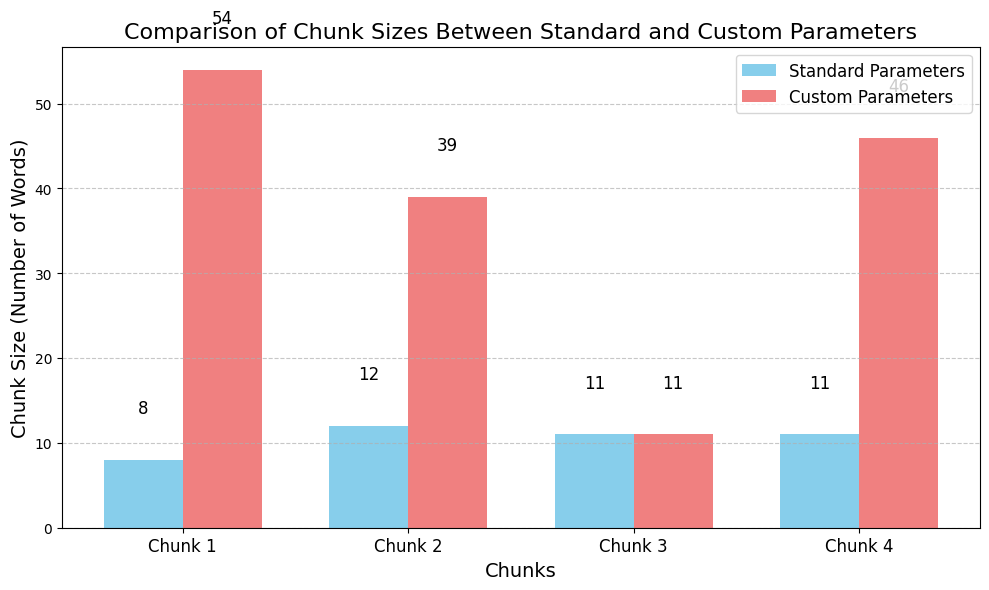

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
chunks_standard = [
    "Brazil is the world's fifth-largest country by area",
    "and the seventh most populous . Its capital is Brasília , and",
    "its most populous city is São Paulo . The federation is",
    "composed of the union of the 26 states  and the Federal"
]

chunks_custom = [
    "Brazil is the world's fifth-largest country by area\nand the seventh most populous . Its capital is Brasília , and\nits most populous city is São Paulo . The federation is\ncomposed of the union of the 26 states  and the Federal\nDistrict . It is the only country in the Americas  to have",
    "Portuguese  as an official language .[12][13] It is one of the\nmost multicultural  and ethnically diverse nations, due to\nover a century of mass immigration from around the\nworld ,[14] and the most populous Roman Catholic-\nmajority country .",
    "Bounded by the Atlantic Ocean  on the east, Brazil has a",
    "coastline  of 7,491 kilometers (4,655 mi).[15] It borders all\nother countries and territories in South America except\nEcuador  and Chile  and covers roughly half of the\ncontinent's land area.[16] Its Amazon basin  includes a vast\ntropical forest , home to diverse wildlife , a variety of",
]

# Calculate the chunk sizes
chunk_sizes_standard = [len(chunk.split()) for chunk in chunks_standard]
chunk_sizes_custom = [len(chunk.split()) for chunk in chunks_custom]

# Create labels for the chunks
chunk_labels = [f"Chunk {i+1}" for i in range(len(chunks_standard))]

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the chunk sizes for both sets of parameters
bar_width = 0.35
index = np.arange(len(chunks_standard))
bar1 = plt.bar(index, chunk_sizes_standard, bar_width, label='Standard Parameters', color='skyblue')
bar2 = plt.bar(index + bar_width, chunk_sizes_custom, bar_width, label='Custom Parameters', color='lightcoral')

# Add labels, title, and legend
plt.xlabel('Chunks', fontsize=14)
plt.ylabel('Chunk Size (Number of Words)', fontsize=14)
plt.title('Comparison of Chunk Sizes Between Standard and Custom Parameters', fontsize=16)
plt.xticks(index + bar_width / 2, chunk_labels, fontsize=12)
plt.legend(fontsize=12)

# Add data labels above the bars
for i, v in enumerate(chunk_sizes_standard):
    ax.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=12)
for i, v in enumerate(chunk_sizes_custom):
    ax.text(i + bar_width, v + 5, str(v), ha='center', va='bottom', fontsize=12)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


## KMeans Clustering

In [57]:
"""
Sentence Clustering is a methodology used to categorize sentences by their semantic likeness.
Through the utilization of sentence embeddings and the application of clustering algorithms like K-means,
we can put Sentence Clustering into practice.
"""
!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

# Load the Sentence Transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Define a list of sentences (your text data)
sentences = ["This is an example sentence.", "Another sentence goes here.", "..."]

# Generate embeddings for the sentences
embeddings = model.encode(sentences)

# Choose an appropriate number of clusters (here we choose 5 as an example)
num_clusters = 3

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Evaluating KMeans Clustering
And finally we plot a WordCloud for each cluster.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


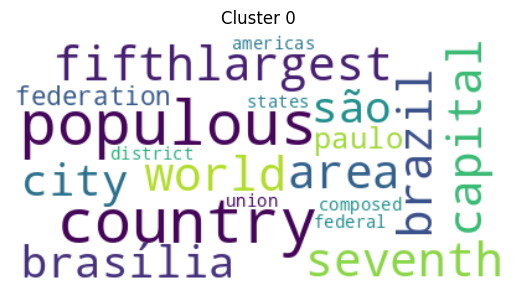

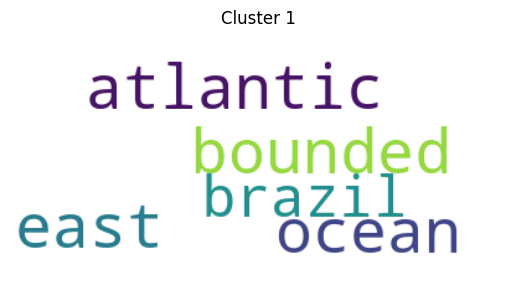

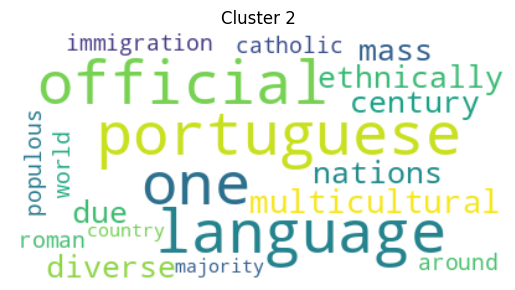

In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('stopwords')

# Define a list of stop words
stop_words = set(stopwords.words('english'))

# Define a function to clean sentences
def clean_sentence(sentence):
    # Tokenize the sentence
    tokens = word_tokenize(sentence)
    # Convert to lower case
    tokens = [w.lower() for w in tokens]
    # Remove punctuation
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # Remove non-alphabetic tokens
    words = [word for word in stripped if word.isalpha()]
    # Filter out stop words
    words = [w for w in words if not w in stop_words]
    return words

# Compute and print Word Clouds for each cluster
for i in range(num_clusters):
    cluster_sentences = [chunks_custom[j] for j in range(len(sentences)) if clusters[j] == i]
    cleaned_sentences = [' '.join(clean_sentence(s)) for s in cluster_sentences]
    text = ' '.join(cleaned_sentences)

    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Cluster {i}")
    plt.show()
else:
    print("No words found in the text for generating a word cloud.")

Above we have the WordCloud plots for the generated clusters

 In our examination of the word cloud generated from KMeans clustering, it becomes clear that each cluster can be distinctly characterized by the semantics of its most frequent words. This showcases a robust semantic distinction among the clusters. Additionally, we observe a notable diversity in the sizes of these clusters, signifying a substantial difference in the number of sequences contained within each cluster



### Clustering Semantically Similar Adjacent Sentences

In [ ]:
import numpy as np
import spacy
import re
# Load the Spacy model
nlp = spacy.load('en_core_web_sm')


def process(text):
    doc = nlp(text)
    sents = list(doc.sents)
    vecs = np.stack([sent.vector / sent.vector_norm for sent in sents])

    return sents, vecs


def cluster_text(sents, vecs, threshold):
    clusters = [[0]]
    for i in range(1, len(sents)):
        if np.dot(vecs[i], vecs[i-1]) < threshold:
            clusters.append([])
        clusters[-1].append(i)

    return clusters

def clean_text(text):
    # Remove non-alphanumeric characters and extra spaces
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = ' '.join(text.split())  # Remove extra spaces

    return text

# Initialize the clusters lengths list and final texts list
clusters_lens = []
final_texts = []

# Process the chunk
threshold = 0.3
sents, vecs = process(text)

# Cluster the sentences
clusters = cluster_text(sents, vecs, threshold)

for cluster in clusters:
    cluster_txt = clean_text(' '.join([sents[i].text for i in cluster]))
    cluster_len = len(cluster_txt)

    # Check if the cluster is too short
    if cluster_len < 60:
        continue

    # Check if the cluster is too long
    elif cluster_len > 3000:
        threshold = 0.6
        sents_div, vecs_div = process(cluster_txt)
        reclusters = cluster_text(sents_div, vecs_div, threshold)

        for subcluster in reclusters:
            div_txt = clean_text(' '.join([sents_div[i].text for i in subcluster]))
            div_len = len(div_txt)

            if div_len < 60 or div_len > 3000:
                continue

            clusters_lens.append(div_len)
            final_texts.append(div_txt)

    else:
        clusters_lens.append(cluster_len)
        final_texts.append(cluster_txt)